In [59]:
#Lab 12

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import seaborn as sns

In [60]:
df = pd.read_csv("test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
dff = pd.read_csv("train.csv")
dff

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
df=pd.concat([df,dff], ignore_index=True)

In [63]:
df.shape

(1309, 12)

In [64]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.Age

0       34.500000
1       47.000000
2       62.000000
3       27.000000
4       22.000000
          ...    
1304    27.000000
1305    19.000000
1306    29.881138
1307    26.000000
1308    32.000000
Name: Age, Length: 1309, dtype: float64

In [65]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.881138,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1.0


In [66]:
df.Survived

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

In [67]:
df.Survived.fillna(df.Survived.mode()[0],inplace=True)
df.Survived

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 1309, dtype: float64

In [68]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

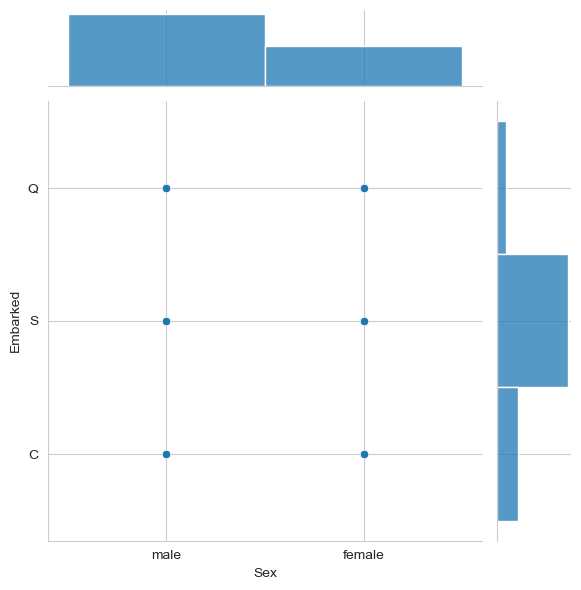

In [69]:
sns.jointplot(x ="Sex", y ="Embarked", data = df)

In [70]:
df["Sex"] = [ 1 if i=="male" else 0 for i in df["Sex"]]


<Axes: xlabel='Sex', ylabel='Count'>

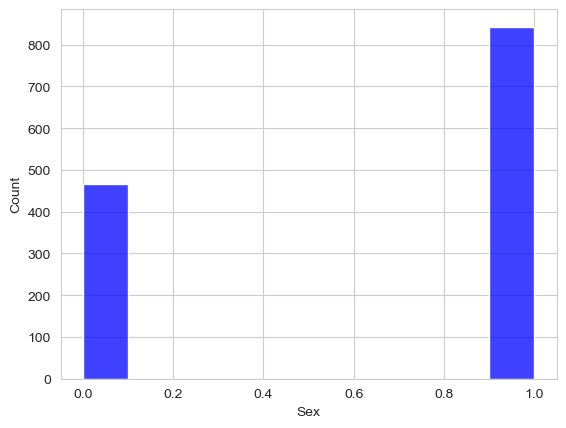

In [71]:
sns.set_style("whitegrid")
sns.histplot(df["Sex"],color ="Blue", bins = 10)

<Axes: xlabel='Embarked', ylabel='Count'>

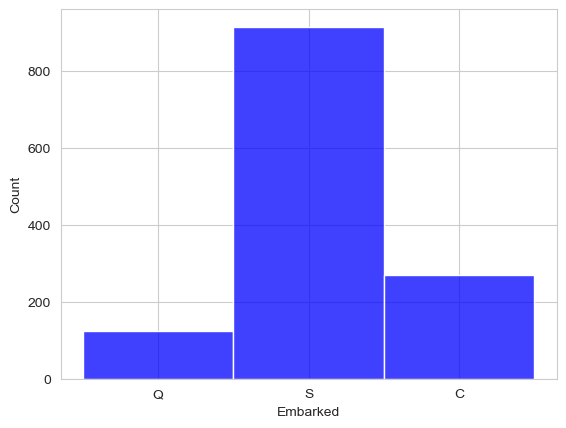

In [72]:
sns.set_style("whitegrid")
sns.histplot(df["Embarked"],color ="Blue", bins = 10)

<Axes: xlabel='Survived', ylabel='Count'>

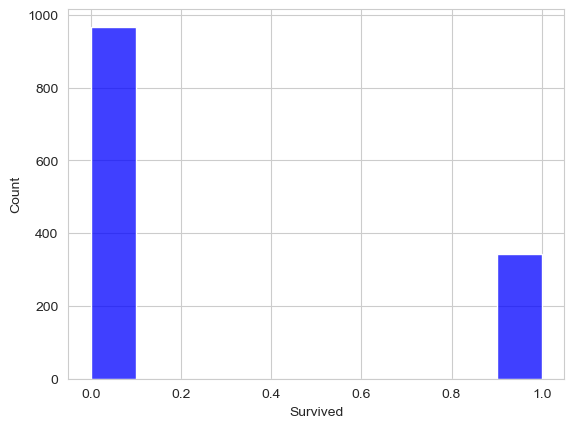

In [73]:
sns.set_style('whitegrid')
sns.histplot(df['Survived'],color ='Blue', bins = 10)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [75]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,0.0
1305,888,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,1.0
1306,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.881138,1,2,W./C. 6607,23.4500,NaN,S,0.0
1307,890,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,1.0


In [76]:
df.drop(columns = ["PassengerId", "Cabin","Name","Ticket"] , inplace=True)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,Q,0.0
1,3,0,47.0,1,0,7.0000,S,0.0
2,2,1,62.0,0,0,9.6875,Q,0.0
3,3,1,27.0,0,0,8.6625,S,0.0
4,3,0,22.0,1,1,12.2875,S,0.0


<Axes: xlabel='Pclass', ylabel='Count'>

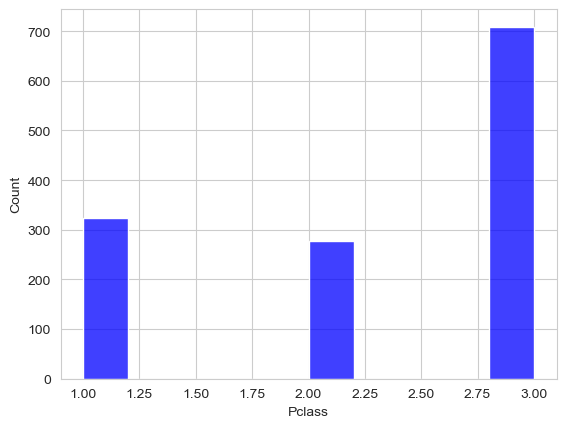

In [77]:
sns.set_style("whitegrid")
sns.histplot(df["Pclass"],color ="Blue", bins = 10)

In [78]:
df.shape

(1309, 8)

In [79]:
df.Fare.fillna(df.Fare.mode()[0],inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.500000,0,0,7.8292,Q,0.0
1,3,0,47.000000,1,0,7.0000,S,0.0
2,2,1,62.000000,0,0,9.6875,Q,0.0
3,3,1,27.000000,0,0,8.6625,S,0.0
4,3,0,22.000000,1,1,12.2875,S,0.0
...,...,...,...,...,...,...,...,...
1304,2,1,27.000000,0,0,13.0000,S,0.0
1305,1,0,19.000000,0,0,30.0000,S,1.0
1306,3,0,29.881138,1,2,23.4500,S,0.0
1307,1,1,26.000000,0,0,30.0000,C,1.0


In [80]:
df.drop(columns = ["Embarked"] , inplace=True)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,34.5,0,0,7.8292,0.0
1,3,0,47.0,1,0,7.0000,0.0
2,2,1,62.0,0,0,9.6875,0.0
3,3,1,27.0,0,0,8.6625,0.0
4,3,0,22.0,1,1,12.2875,0.0


In [81]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, shuffle=True, random_state=42)

In [83]:
x_train.shape

(1047, 6)

In [84]:
y_train.shape

(1047,)

In [85]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [86]:
model.score(x_train,y_train)

0.7956064947468959

In [87]:
model.score(x_test,y_test)

0.7709923664122137

In [88]:
y_predict = model.predict(x_test)

In [89]:
y_predict

array([1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [90]:
accuracy = model.score(x_test,y_test)

In [91]:
accuracy

0.7709923664122137

In [92]:
print(accuracy_score(y_test, y_predict))

0.7709923664122137
